In [214]:
import seaborn as sns
import os
from scipy import stats
import pandas as pd
from nltk.corpus import stopwords
import spacy
from spacy.matcher import Matcher
import numpy as np
from sklearn import metrics
import statsmodels
from  Featureimport com

In [215]:
def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))

def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))

def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [216]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [217]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object

In [218]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected

In [224]:
# Load speech transcript
p = '/export/b15/afavaro/stable-ts/ENGLISH_TXT/'
path = [os.path.join(p, file) for file in os.listdir(p)]
paths = []
for p in path:
        paths.append(p)

In [225]:
# Create data frame

transcr = []
for file in paths:
    if file.endswith('.txt'):
        with open(file, "r") as f:
            string_without_line_breaks = ""
            for line in f:
                stripped_line = line.rstrip()
                string_without_line_breaks += stripped_line
            transcr.append(string_without_line_breaks)

In [257]:
com = [os.path.basename(file).split("_ses")[0] for file in paths]
task = [(os.path.basename(file).split("_")[3].split(".wav"))[0] for file in paths]
dataframe = {'tot_name': com, 'sentence': transcr, 'task': task}
df_10msec = pd.DataFrame(dataframe)
pd.set_option('display.max_colwidth', None)

,tot_name,sentence,task
0,PEC_10,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.The rainbow is a division of white light into many beautiful colors.These take the shape of a long round arch, with its path high above and its two endsapparently beyond the horizon.There is, according to legend, a boiling pot of gold at one end.People look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen considered the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage
1,NLS_107,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.The rainbow is a division of white light into many beautiful colors.These take the shape of a long-round arch, but its path high above and its two ends apparentlybeyond the horizon.There is, according to legend, a boiling pot of gold at one end.People look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen consider the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage
2,PEC_41,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.A rainbow is a division of white light into many beautiful colors.These take the shape of a long round arch with its path high above and its two endsapparently beyond the horizon.There is, according to legend, a boiling pot of gold at one end.You'll look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen considered the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage
3,PEC_22,do not stand at my grave and weep I am not there I do not sleep I am a thousandwinds that blow I am the diamond glints on snow I am the sunlight on ripenedgrain I am the gentle autumn rain when you awaken in the morning's hush I amthe swift uplifting rush of quiet birds in circled flight I am the soft starsthat shine at night do not stand at my grave and cry I am not there I did notdie,Poem
4,NLS_81,"kitchen dishes mom two kids getting in the cookie jar still falling over sinkoverflowing dishes on the counter bushes outside see the other corner of thehouse curtains, tree, roof, shoesI don't know what more I could saywell mom's doing dishes the kids rich in the cookie jar to give the sister acookie it's a boy getting in a kid in the cookie jar and again mom's drawingdishes or washing, drying, whatever",CookieThief
...,...,...,...
324,PEC_12,"We're going to switch it up now.We're going to try and read something funnier.OK.Two men meet on the opposite side of the river.One shouts to the other.I need you to help me get to the other side.The other guy replies, you're on the other side.Why aren't the Australian bear colas?How do you say that?Actual 

In [258]:
label_seneca = pd.read_excel("/export/b15/afavaro/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist() #id
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = df_10msec['tot_name'].tolist()
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
df_10msec['label'] = label_new_
df = df_10msec

,tot_name,sentence,task,label
0,PEC_10,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.The rainbow is a division of white light into many beautiful colors.These take the shape of a long round arch, with its path high above and its two endsapparently beyond the horizon.There is, according to legend, a boiling pot of gold at one end.People look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen considered the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage,CTRL
1,NLS_107,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.The rainbow is a division of white light into many beautiful colors.These take the shape of a long-round arch, but its path high above and its two ends apparentlybeyond the horizon.There is, according to legend, a boiling pot of gold at one end.People look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen consider the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage,CTRL
2,PEC_41,"When sunlight strikes raindrops in the air, they act like a prism and form a rainbow.A rainbow is a division of white light into many beautiful colors.These take the shape of a long round arch with its path high above and its two endsapparently beyond the horizon.There is, according to legend, a boiling pot of gold at one end.You'll look, but no one ever finds it.When a man looks for something beyond his reach, his friends say he is looking for thepot of gold at the end of the rainbow.Throughout the centuries, men have explained the rainbow in various ways.Some have accepted it as a miracle without physical explanation.To the Hebrews, it was a token that there would be no more universal floods.The Greeks used to imagine that it was a sign from the gods to foretell war or heavy rain.The Norsemen considered the rainbow as a bridge over which the gods passed from the earthto their home in the sky.",RainbowPassage,CTRL
3,PEC_22,do not stand at my grave and weep I am not there I do not sleep I am a thousandwinds that blow I am the diamond glints on snow I am the sunlight on ripenedgrain I am the gentle autumn rain when you awaken in the morning's hush I amthe swift uplifting rush of quiet birds in circled flight I am the soft starsthat shine at night do not stand at my grave and cry I am not there I did notdie,Poem,CTRL
4,NLS_81,"kitchen dishes mom two kids getting in the cookie jar still falling over sinkoverflowing dishes on the counter bushes outside see the other corner of thehouse curtains, tree, roof, shoesI don't know what more I could saywell mom's doing dishes the kids rich in the cookie jar to give the sister acookie it's a boy getting in a kid in the cookie jar and again mom's drawingdishes or washing, drying, whatever",CookieThief,PD
...,...,...,...,...
324,PEC_12,"We're going to switch it up now.We're going to try and read something funnier.OK.Two men meet on the opposite side of the river.One shouts to the other.I need you to help me get to the other side.The other guy replies, you're on the other side.Why aren't the Australian bear 

### LINGUISTIC FEATURES

In [260]:
nlp = spacy.load('en_core_web_sm')

In [261]:
df['sentence'] = df['sentence'].str.lower()

#Customized list of stopwords 
stopwords = list(stopwords.words('english'))

def preprocess(text):
    '''This is a function to perform tokenization, lemmatization, removal of non-alphabetic characters
    and stopword removal'''
  # Create Doc object
    doc = nlp(text, disable=['ner'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)

In [263]:
df['Item'] = df['sentence'].apply(preprocess)

In [264]:
def count_words(string):
    '''This function returns the number of words in a string'''
    # Split the string into words
    words = string.split()
    # Return the number of words
    return len(words)

#Application to the raw data to get the full word count

df['Word_Count'] = df['sentence'].apply(count_words)

#Application to the preprocessed data to get the content-word count

df['Word_Count_No_stop_words'] = df['Item'].apply(count_words)



In [265]:
def word_length(string):
    '''This function returns the average word length in characters for the words in an item'''
    #Get the length of the full text in characters
    chars = len(string)
    #Split the string into words
    words = string.split()
    #Compute the average word length and round the output to the second decimal point
    if len(words)!=0:
        avg_word_length = chars/len(words)
   
        return round(avg_word_length, 2)

df['Avg_Word_Length'] = df['Item'].apply(word_length)

In [267]:
def sentence_counter(text):
    '''This function returns the number of sentences in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    counter = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sentence in doc.sents:
        counter = counter + 1
    return counter

#Note that this function is applied to the raw text in order to identify sentence boundaries

df['Sentence_Count'] = df['sentence'].apply(sentence_counter)


In [268]:
def avg_sent_length(text):
    '''This function returns the average sentence length in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    sent_number = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sent in doc.sents:
        sent_number = sent_number + 1
    #Get the number of words
    words = text.split()
    #Compute the average sentence length and round it to the second decimal point
    avg_sent_length = len(words)/sent_number
    return round(avg_sent_length, 2)

#Note that this function is applied to the raw text in order to identify sentence boundaries
df['Avg_Sent_Length_in_Words'] = df['sentence'].apply(avg_sent_length)


In [269]:
def nouns(text, model=nlp):
    '''This function returns the number of nouns in an item'''
    # Create doc object 
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of nouns
    return pos.count('NOUN')

df['Noun_Count'] = df['Item'].apply(nouns)
#df.head()

In [270]:
def verbs(text, model=nlp):
    '''This function returns the number of verbs in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of verbs
    return pos.count('VERB')

df['Verb_Count'] = df['Item'].apply(verbs)


In [271]:
def adjectives(text, model=nlp):
    '''This function returns the number of adjectives in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adjectives
    return pos.count('ADJ')

df['Adjective_Count'] = df['Item'].apply(adjectives)

In [272]:
def numeral(text, model=nlp):
    '''This function returns the number of numerals (e.g., billion) in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('NUM')

df['Numeral_Count'] = df['sentence'].apply(numeral) #meglio estrarlo dall'originale
#df.head()

In [273]:
def aux(text, model=nlp):
    '''This function returns the number of auxiliary in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('AUX')

df['Auxiliary_Count'] = df['sentence'].apply(aux) #meglio estrarlo dall'originale
#df.head()

In [274]:
def get_nps(text):
    '''This is a function that outputs the number of noun phrases in an item'''
    doc = nlp(text)
    NP_count = 0
    for np in doc.noun_chunks:
        NP_count = NP_count + 1
    return NP_count
    #print(np)

df['Number_of_NPs'] = df['Item'].apply(get_nps)
#df.head()

In [275]:
def get_pps(text):
    '''This is a function that outputs the number of prepositional phrases in an item'''
    doc = nlp(text)
    pps = 0
    for token in doc:
        # You can try this with other parts of speech for different subtrees.
        if token.pos_ == 'ADP':
            
            #Use the command below if you wanted to get the actual PPs
            #pp = ' '.join([tok.orth_ for tok in token.subtree])
            
            #This command counts the number of PPs
            pps = pps + 1
            
    return pps

df['Number_of_PPs'] = df['Item'].apply(get_pps)

In [276]:
pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'AUX', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]


def get_vps(text):
    '''This function returns the number of verb phrases in an item'''
    doc = nlp(text)
    vps = 0
    # instantiate a Matcher instance
    matcher = Matcher(nlp.vocab)
    matcher.add("Verb phrase", [pattern], on_match=None) #new syntax of the command
    # call the matcher to find matches 
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    for match in matches:
        vps = vps +1
    return vps
    
df['Number_of_VPs'] = df['Item'].apply(get_vps)
#df.head()

In [277]:
def informational_verb(text):
   
   '''Exhaustivness of the description operationalized by 
   counting how many (if any) salient items (nouns) are mentioned. '''
   
   cont_con = 0
   
   if "washing" in text:
       cont_con = cont_con + 1
   if "wash" in text:
       cont_con = cont_con + 1
   
   if "overflowing" in text:
       cont_con = cont_con + 1
     
   if "overflow" in text:
       cont_con = cont_con + 1
       
   if "hanging" in text:
       cont_con = cont_con + 1
   if "hang" in text:
       cont_con = cont_con + 1
       
   if "falling" in text:
       cont_con = cont_con + 1
   if "fall" in text:
       cont_con = cont_con + 1
       
   if "wearing" in text:
       cont_con = cont_con + 1
   if "wear" in text:
       cont_con = cont_con + 1
   if "running" in text:
       cont_con = cont_con + 1
       
   if "run" in text:
       cont_con = cont_con + 1
       
   if "drying" in text:
       cont_con = cont_con + 1
   if "dry" in text:
       cont_con = cont_con + 1
   if "paying attention" in text:
       cont_con = cont_con + 1
   if "reaching" in text:
       cont_con = cont_con + 1
   if "reach" in text:
       cont_con = cont_con + 1
   if "tipping" in text:
       cont_con = cont_con + 1
   if "tipp" in text:
       cont_con = cont_con + 1
    
   return cont_con

df['informational_verb'] = df['sentence'].apply(informational_verb)

In [279]:
task_grouped_ = df.groupby('task')
cookie = task_grouped_.get_group("CookieThief") # extract task of interest

## Cookie Theft picture (Spontaneous speech)

In [288]:
grouped = cookie.groupby('label')
control = grouped.get_group('CTRL') 
parkinson_ = grouped.get_group("PD") 
# Remove control subjects who have a MOCA score lower than 25
control = control[~control.tot_name.str.contains("PEC_4")]
control = control[~control.tot_name.str.contains("PEC_5")]
control = control[~control.tot_name.str.contains("PEC_9")]
control = control[~control.tot_name.str.contains("PEC_14")]
control = control[~control.tot_name.str.contains("PEC_15")]
control = control[~control.tot_name.str.contains("PEC_16")]
control = control[~control.tot_name.str.contains("PEC_17")]
control = control[~control.tot_name.str.contains("PEC_18")]
control = control[~control.tot_name.str.contains("PEC_19")]
control = control[~control.tot_name.str.contains("PEC_23")]
control = control[~control.tot_name.str.contains("PEC_25")]
control = control[~control.tot_name.str.contains("PEC_29")]
control = control[~control.tot_name.str.contains("PEC_35")]

# Remove PD subjects with a probable diagnosis
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.tot_name.str.contains("NLS_12")]

task = cookie.columns[5:].values.tolist()
PD_all_feat = np.array([parkinson_[feat] for feat in np.array(cookie.columns[5:])])
CN_all_feat = np.array([control[feat] for feat in np.array(cookie.columns[5:])])

with open('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Linguistic/all_ling.txt', 'w') as f:
 
    kruskal(f, task, CN_all_feat,  PD_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/COLOMBIAN/Linguistic/all_ling.txt')

holm_correction(kruskal_1)

['Word_Count',
 'Word_Count_No_stop_words',
 'Avg_Word_Length',
 'Sentence_Count',
 'Avg_Sent_Length_in_Words',
 'Noun_Count',
 'Verb_Count',
 'Adjective_Count',
 'Numeral_Count',
 'Auxiliary_Count',
 'Number_of_NPs',
 'Number_of_PPs',
 'Number_of_VPs',
 'informational_verb']

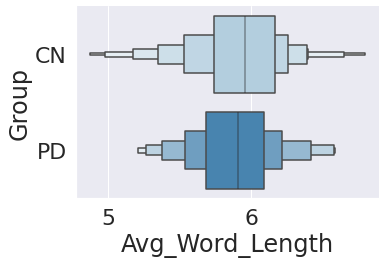

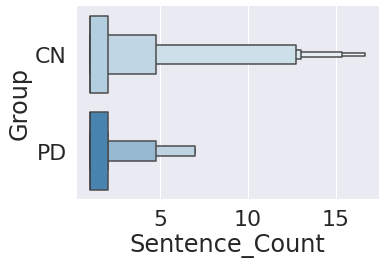

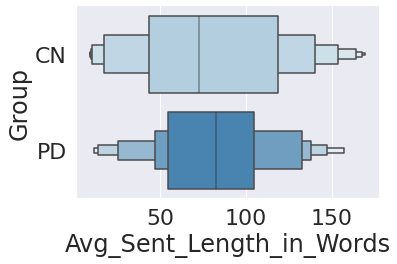

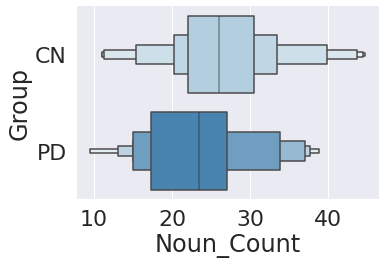

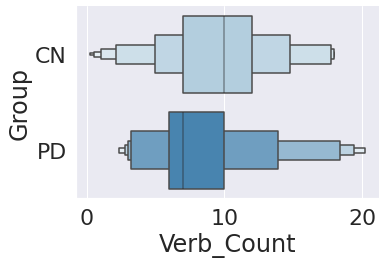

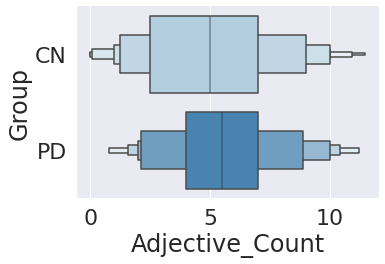

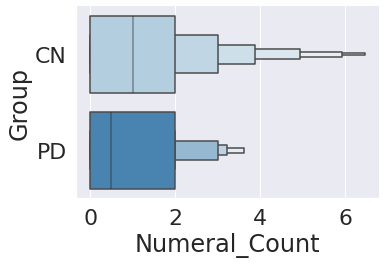

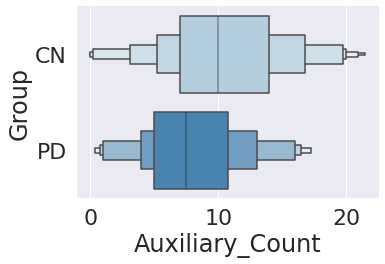

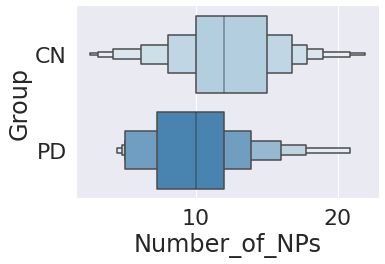

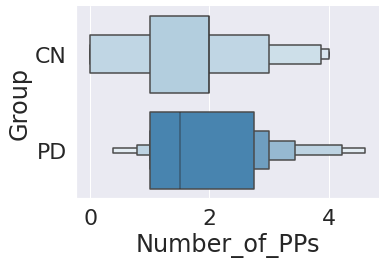

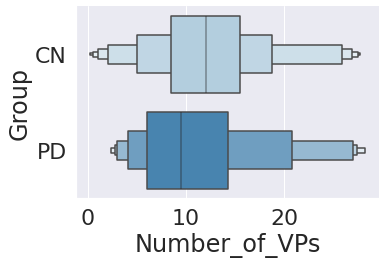

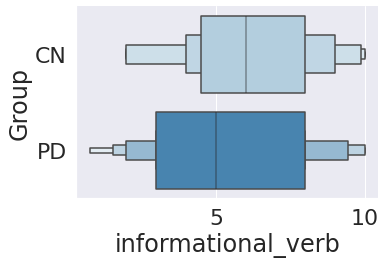

In [285]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([CN_all_feat[i], PD_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(CN_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(PD_all_feat[i]))]
    lista = controls+parkinson
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)

    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    